In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patches as mpatches
from collections import Counter

url = "https://raw.githubusercontent.com/kimarlee/Tic-Tac-Toe/refs/heads/main/tic_tac_toe_data.csv"
df = pd.read_csv(url)

In [4]:
df.head()

,Winner,Move 1-X (Row-Col),Move 2-O (Row-Col),Move 3-X (Row-Col),Move 4-O (Row-Col),Move 5-X (Row-Col),Move 6-O (Row-Col),Move 7-X (Row-Col),Move 8-O (Row-Col),Move 9-X (Row-Col)
0,X,0-0,0-1,1-0,0-2,2-0,---,---,---,---
1,X,0-0,0-1,1-0,1-1,2-0,---,---,---,---
2,X,0-0,0-1,1-0,1-2,2-0,---,---,---,---
3,X,0-0,0-1,1-0,2-1,2-0,---,---,---,---
4,X,0-0,0-1,1-0,2-2,2-0,---,---,---,---


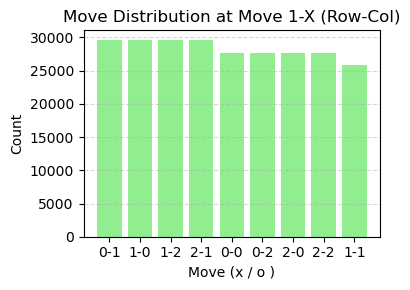

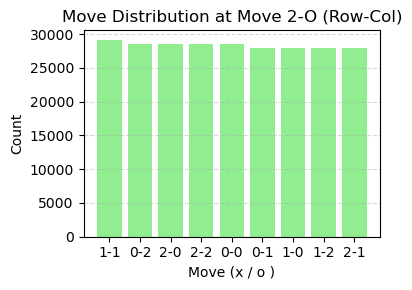

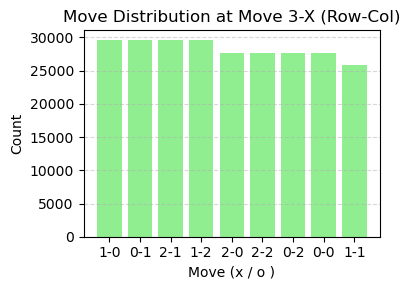

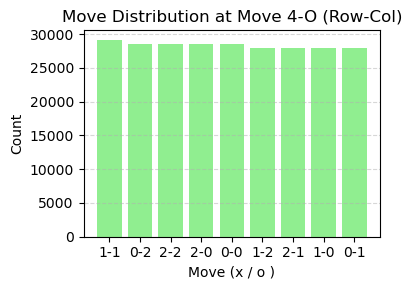

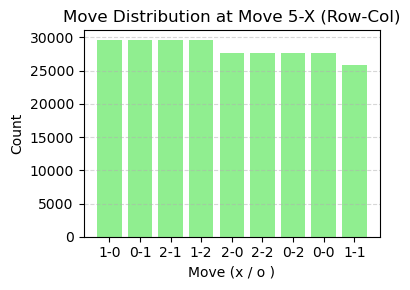

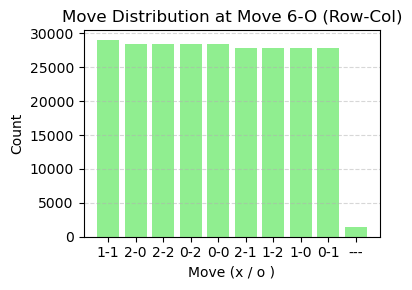

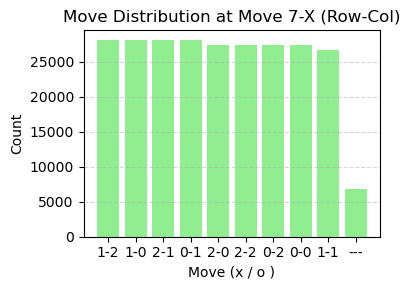

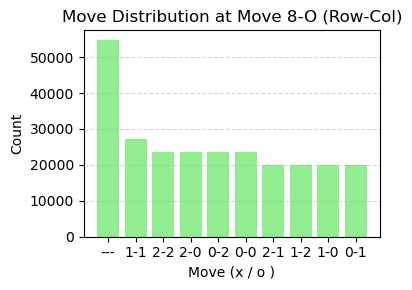

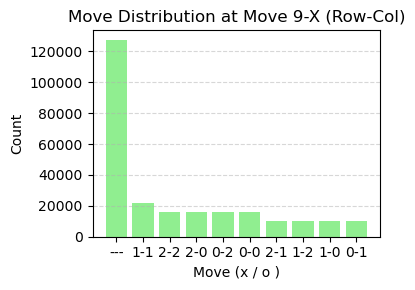

In [2]:
positions = df.columns[1:]  # All board positions (exclude 'Winner')

for pos in positions:
    move_counts = df[pos].value_counts()

    plt.figure(figsize=(4, 3))
    plt.bar(move_counts.index, move_counts.values, color='lightgreen')
    plt.title(f"Move Distribution at {pos}")
    plt.xlabel("Move (x / o )")
    plt.ylabel("Count")
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()


In [3]:
df['Winner'] = df['Winner'].replace('-', 'Ties')

In [4]:
# Count the occurrences of each winner
winner_counts = df['Winner'].value_counts()

# Calculate the total number of games
total_games = len(df)

# Calculate the winning percentages
winning_percentages = (winner_counts / total_games) * 100

print(winning_percentages)

Winner
X       51.410835
O       30.530474
Ties    18.058691
Name: count, dtype: float64


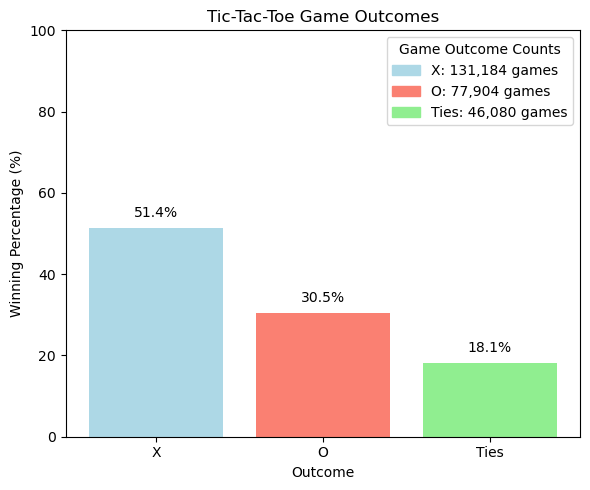

In [5]:
# Define the colors (make sure order matches the index)
colors = ['lightblue', 'salmon', 'lightgreen']

# Create the bar plot and get the axes object
fig, ax = plt.subplots(figsize=(6,5))
bars = ax.bar(winning_percentages.index, winning_percentages.values, color=colors)

# Annotate the bars with percentages
for i, v in enumerate(winning_percentages.values):
    ax.text(i, v + 2, f'{v:.1f}%', ha='center', va='bottom')

# Create legend labels with counts
labels = [f"{outcome}: {count:,} games" for outcome, count in winner_counts.items()]
# Create custom legend handles (colored boxes)
custom_legend = [plt.Rectangle((0, 0), 1, 1, color=color) for color in colors]
# Add legend to the plot
ax.legend(custom_legend, labels, title="Game Outcome Counts", loc='upper right')

ax.set_xlabel('Outcome')
ax.set_ylabel('Winning Percentage (%)')
ax.set_title('Tic-Tac-Toe Game Outcomes')
ax.set_ylim(0, 100)

plt.tight_layout()
plt.show()

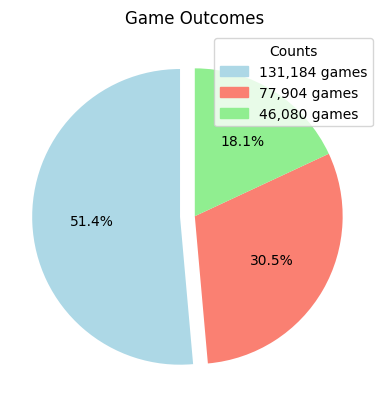

In [40]:


# Pie chart example
winner_counts = df['Winner'].value_counts()
colors = ['lightblue', 'salmon', 'lightgreen']
explode = [0.1, 0, 0]

# Plot pie chart with percentages on slices
plt.pie(winner_counts.values, autopct='%1.1f%%', colors=colors, explode = explode, startangle=90)
plt.title('Game Outcomes')

# Create legend labels with counts only (no category names)
labels = [f"{count:,} games" for count in winner_counts]

# Create color patches for legend (colors must match pie slices)
patches = [mpatches.Patch(color=color, label=label) for color, label in zip(colors, labels)]

plt.legend(handles=patches, title='Counts', loc='upper right')

plt.show()

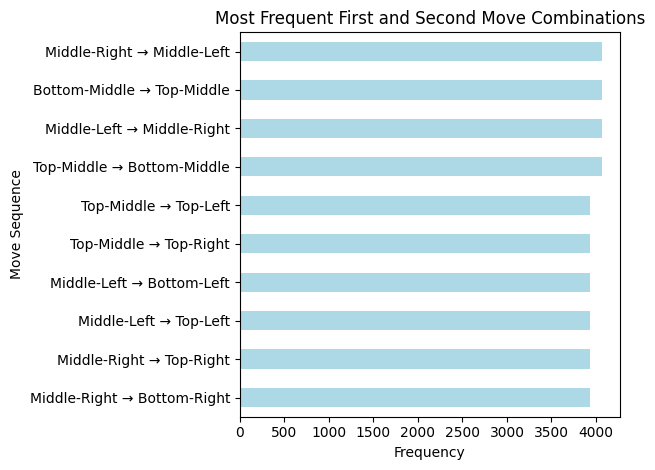

In [41]:
# Define mapping dictionary
coord_to_name = {
    '0-0': 'Top-Left',
    '0-1': 'Top-Middle',
    '0-2': 'Top-Right',
    '1-0': 'Middle-Left',
    '1-1': 'Middle-Middle',
    '1-2': 'Middle-Right',
    '2-0': 'Bottom-Left',
    '2-1': 'Bottom-Middle',
    '2-2': 'Bottom-Right'
}

# Function to rename each label in the Series index
def rename_combo_label(label):
    try:
        move1, move2 = label.split(" -> ")
        return f"{coord_to_name.get(move1, move1)} → {coord_to_name.get(move2, move2)}"
    except:
        return label

# Apply to top 10 combos
combo_counts_named = combo_counts.head(10).rename(index=rename_combo_label)

# Plot it
combo_counts_named.plot(kind='barh', color='lightblue')
plt.xlabel('Frequency')
plt.ylabel('Move Sequence')
plt.title('Most Frequent First and Second Move Combinations')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()



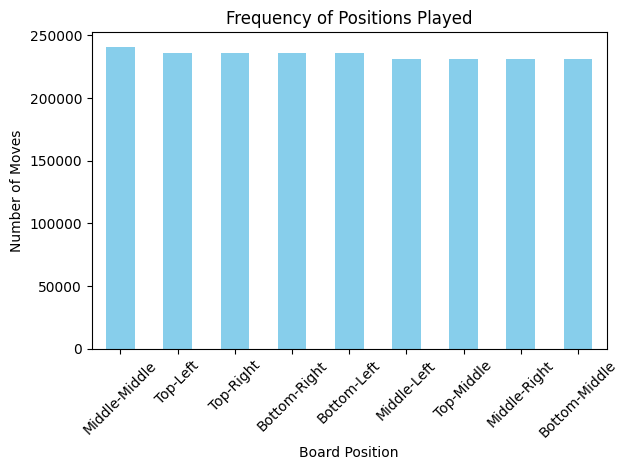

In [32]:
# Identify move columns (exclude "Winner")
move_columns = [col for col in df.columns if col.startswith("Move")]

# Use Counter to tally all move values
position_counter = Counter()

for col in move_columns:
    # Drop nulls and blanks
    cleaned_moves = df[col].dropna()
    cleaned_moves = cleaned_moves[cleaned_moves != "---"]

    # Update the counter
    position_counter.update(cleaned_moves)

# Convert to a pandas Series for plotting
position_counts = pd.Series(position_counter)

# Optional: Sort by most common
position_counts = position_counts.sort_values(ascending=False)

# Map raw coordinates to friendly board names
coord_to_name = {
    '0-0': 'Top-Left',
    '0-1': 'Top-Middle',
    '0-2': 'Top-Right',
    '1-0': 'Middle-Left',
    '1-1': 'Middle-Middle',
    '1-2': 'Middle-Right',
    '2-0': 'Bottom-Left',
    '2-1': 'Bottom-Middle',
    '2-2': 'Bottom-Right'
}

# Rename index (coordinates → friendly names)
position_counts_named = position_counts.rename(index=coord_to_name)

# Plot the result with new names
position_counts_named.plot(kind='bar', color='skyblue')
plt.xlabel('Board Position')
plt.ylabel('Number of Moves')
plt.title('Frequency of Positions Played')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()